In [3]:

from pathlib import Path

import numpy as np

import starfile


In [4]:
# create a 2d histogram showing how many particles from each class are in each tomogram. Might tell us something about which tomograms have lower resolution due to thickness.

In [85]:
input_star_path = Path("/mnt/scratch/ribosomes/kas_k44a/relion_full/Class3D/job009/run_it025_data.star")
output_dir = Path("/mnt/scratch/ribosomes/kas_k44a/relion_full/Class3D/job009/")

input_star = starfile.read(input_star_path)
input_star_optics = input_star["optics"]
input_star_particles = input_star["particles"]

x_labels = sorted(input_star_particles["rlnTomoName"].unique())
x_labels2 = None
if "TomoThicknessNm" in input_star_particles.columns:
    x_labels2 = [input_star_particles["TomoThicknessNm"][
        input_star_particles["rlnTomoName"] == x_labels[i] 
        ].values[0] for i in range(len(x_labels))
        ]
#x_labels2 = [0.0 for i in range(len(x_labels))]

y_labels = sorted(input_star_particles["rlnClassNumber"].unique())

In [86]:
class_dict = {}
for class_number in sorted(input_star_particles["rlnClassNumber"].unique()):
    class_dict[class_number] = {}
    class_particles = input_star_particles[input_star_particles["rlnClassNumber"] == class_number]

    for tomo_name in sorted(input_star_particles["rlnTomoName"].unique()):
        class_dict[class_number][tomo_name] = len(class_particles[class_particles["rlnTomoName"] == tomo_name])

In [87]:
data_array = np.zeros((len(x_labels), len(y_labels)))
for i in range(len(x_labels)):
    for j in range(len(y_labels)):
        data_array[i][j] = class_dict[y_labels[j]][x_labels[i]]

/tmp/ipykernel_681584/1802484287.py:15: RuntimeWarning: divide by zero encountered in log10
  c=[np.log10(data_array[i][j]) for i in range(len(x_labels)) for j in range(len(y_labels))],


[Text(0, 0, '1'),
 Text(0, 1, '2'),
 Text(0, 2, '3'),
 Text(0, 3, '4'),
 Text(0, 4, '5'),
 Text(0, 5, '6'),
 Text(0, 6, '7'),
 Text(0, 7, '8')]

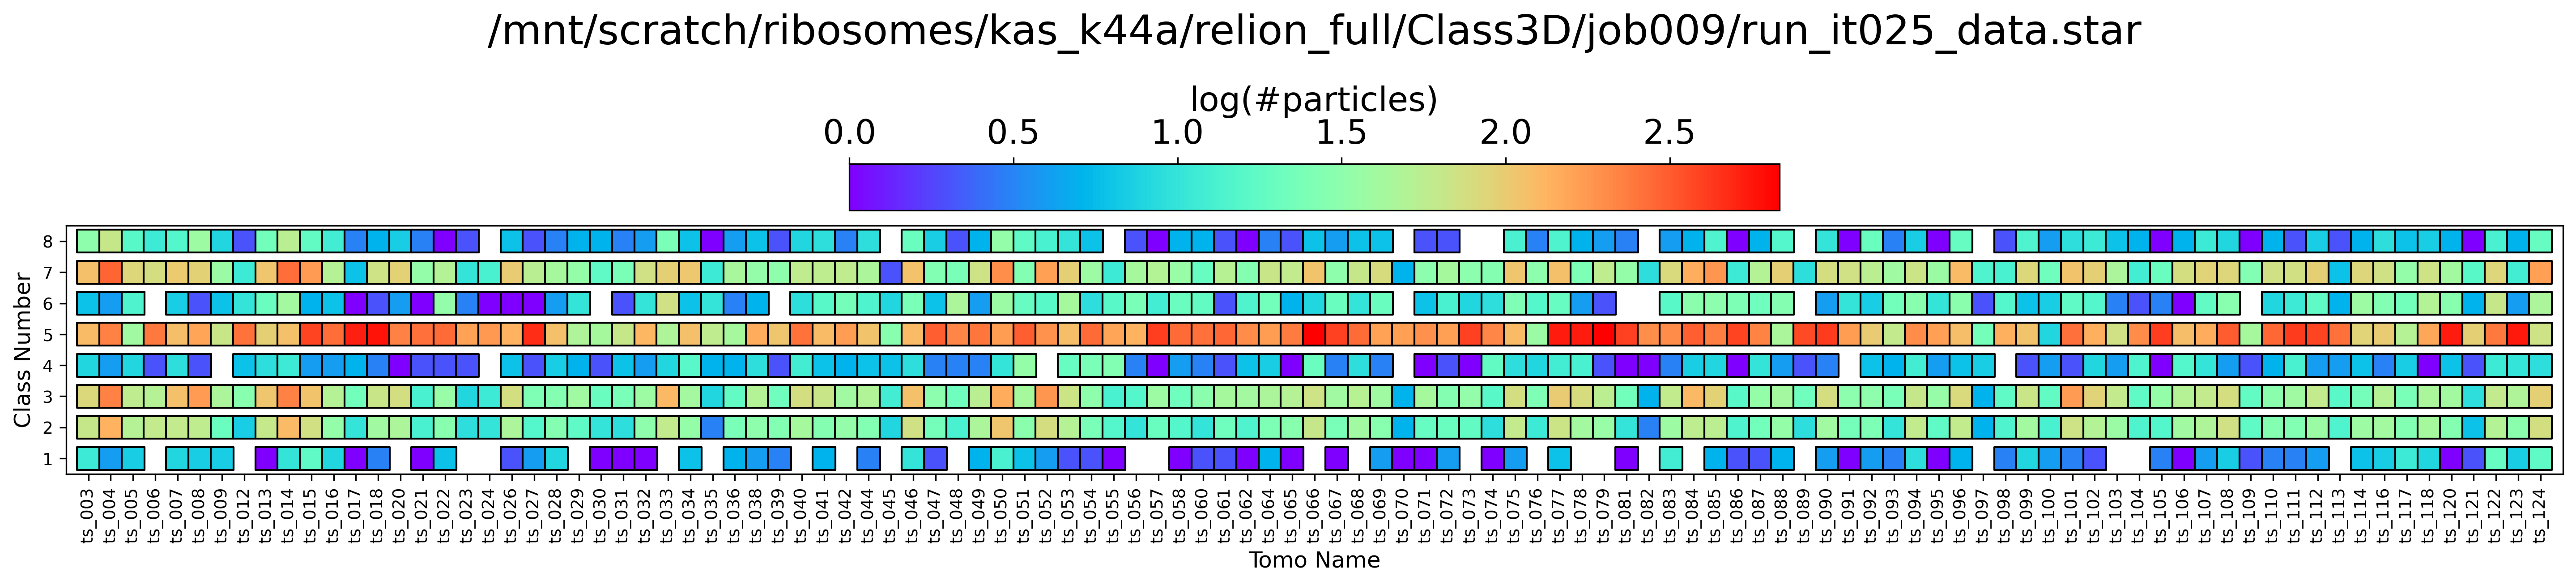

In [99]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker




fig, ax = plt.subplots(figsize=(24, 3), dpi=300)
plt.rcParams.update({'font.size': 18})
sc = ax.scatter(
    x=[i for i in range(len(x_labels)) for j in range(len(y_labels))],
    y=[j for i in range(len(x_labels)) for j in range(len(y_labels))],
    s=150,
    edgecolors="black",
    marker="s",
    c=[np.log10(data_array[i][j]) for i in range(len(x_labels)) for j in range(len(y_labels))],
    cmap="rainbow",
    alpha=1.0,
)
plt.colorbar(
    sc, 
    ax=ax,
    location="top",
    label="log(#particles)",
    )

ax.set_xticks([i for i in range(len(x_labels))])
ax.set_xlim(-1, len(x_labels))
ax.set_xlabel("Tomo Name")
ax.set_yticks([i for i in range(len(y_labels))])
ax.set_ylim(-0.5, len(y_labels)-0.5)
ax.set_ylabel("Class Number")
#ax.grid(alpha=0.5)
ax.set_title(f"{input_star_path}" + "\n", y = 1.5, fontsize=22)

label_fontsize = 9

if x_labels2 == None:
    ax.set_xticklabels(x_labels, rotation=90, fontsize=label_fontsize)
else:
    ax.set_xticklabels([f"Thickness = {x_labels2[i]} nm, " + x_labels[i] for i in range(len(x_labels))], rotation=90, fontsize=label_fontsize)

ax.set_yticklabels(y_labels, fontsize=label_fontsize)
